In [4]:
import cv2
import numpy as np
import pandas as pd
import scipy
from scipy.misc import imread
from PIL import ImageEnhance, ImageFilter
import random
import os
import matplotlib.pyplot as plt
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import VideoFileClip
import shutil
from random import uniform
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from skimage import exposure
import seaborn as sns
%matplotlib inline

In [5]:
from util import *
from img_to_vec import *

In [6]:
IMAGES_DIR = 'test_images'

In [7]:
fnames = [os.path.join(IMAGES_DIR, fname) for fname in os.listdir(IMAGES_DIR)]
imnames = [fname for fname in os.listdir(IMAGES_DIR)]
images = [ cv2.imread(fname) for fname in fnames]
pil_images = [ Image.fromarray(img) for img in images]

Corruptions:
* noise
* rotation
* brightness change
* contrast change
* sharpness change
* hue
* slight aspec ratio change (crop)
* compression artifacts
* blur

# Noise

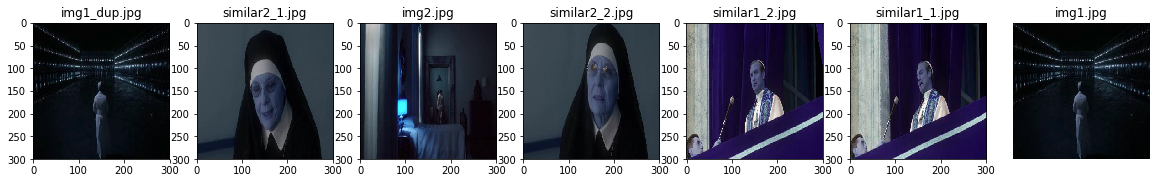

In [10]:
plt.figure(figsize=(20, 10))
i = 0
for img in images:
    plt.subplot(1, len(images), i+1)
    plt.title(imnames[i])
    plot_img(images[i])
    i+=1
plt.axis('off')
plt.show()

In [11]:
def add_gaussian_noise(image, mean=0, var=0.1):
    image = np.array(image)
    row,col,ch= image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy.astype(image.dtype)

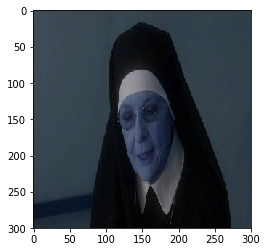

In [12]:
noisy_img = add_gaussian_noise(images[1], var=0.1)
plot_img(noisy_img)

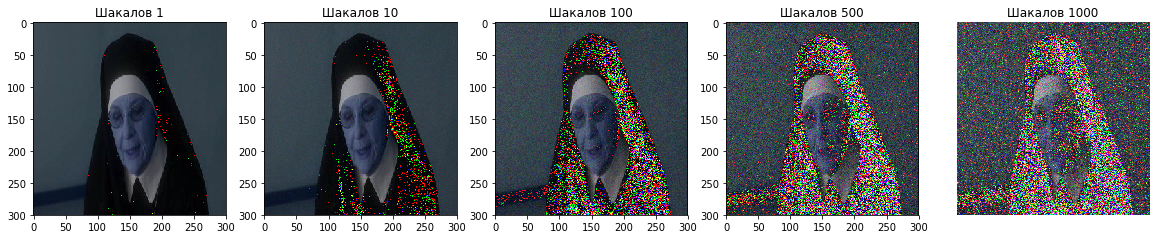

In [13]:
plt.figure(figsize=(20, 10))
img = images[1]
i = 0
variances = [1, 10, 100, 500, 1000]
for var in variances:
    plt.subplot(1, len(variances), i+1)
    plt.title(u'Шакалов '+ str(var))
    plot_img(add_gaussian_noise(img,  var=var))
    i+=1
plt.axis('off')
plt.show()

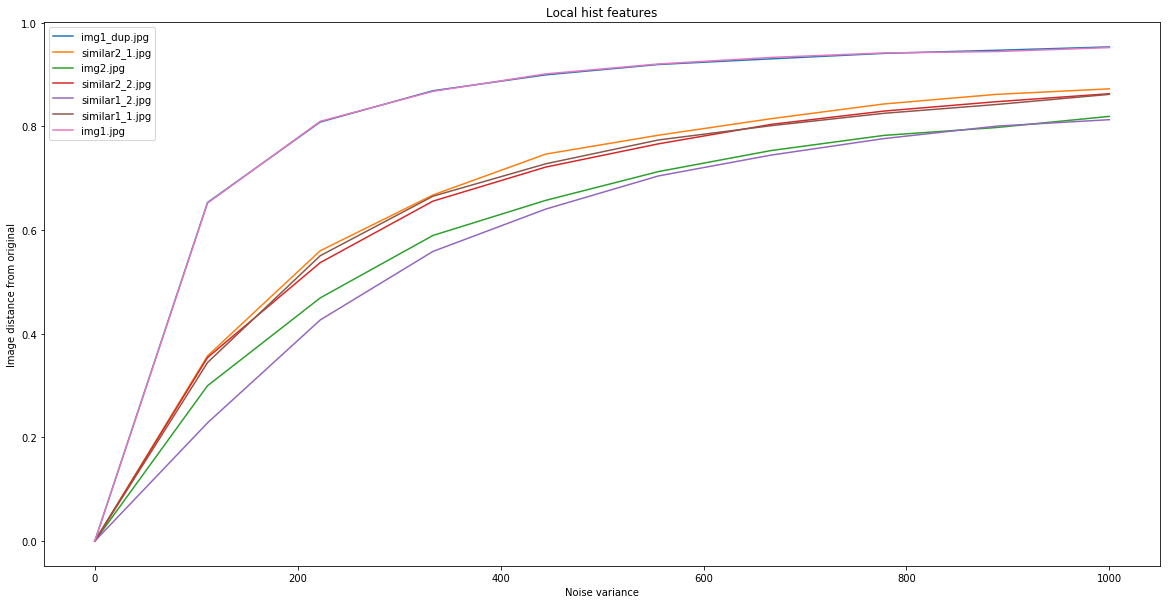

In [14]:
plt.figure(figsize=(20, 10))
variances = np.linspace(0, 1000, 10)
for i, img in enumerate(images):
    original = local_histogram_features(img)
    noisy_pics = [local_histogram_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Local hist features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

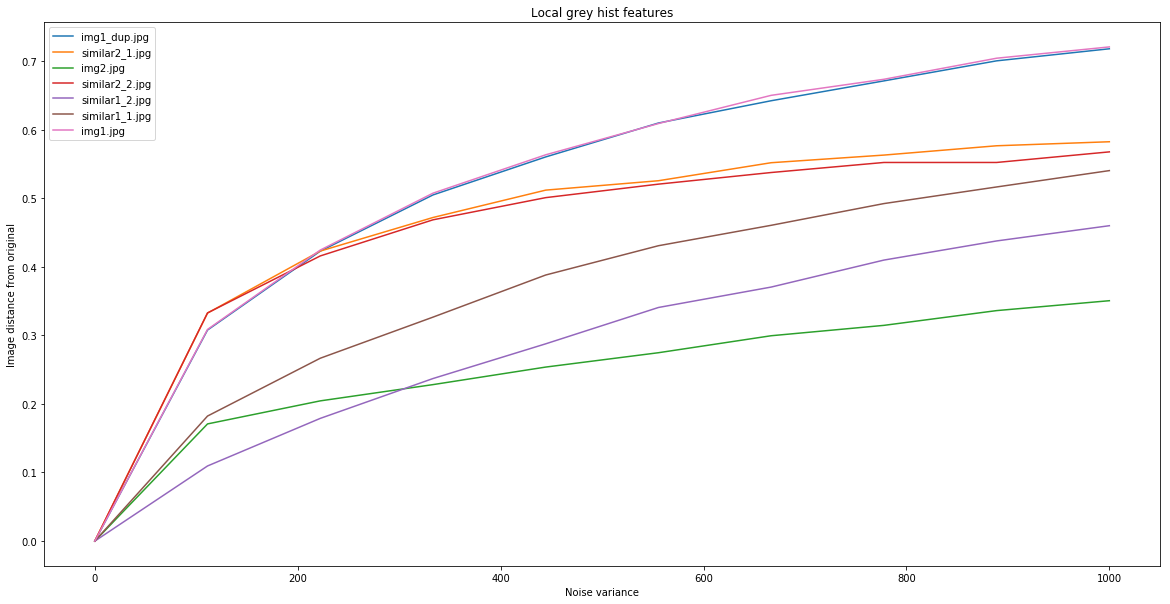

In [15]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = gray_local_histogram_features(img)
    noisy_pics = [gray_local_histogram_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Local grey hist features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

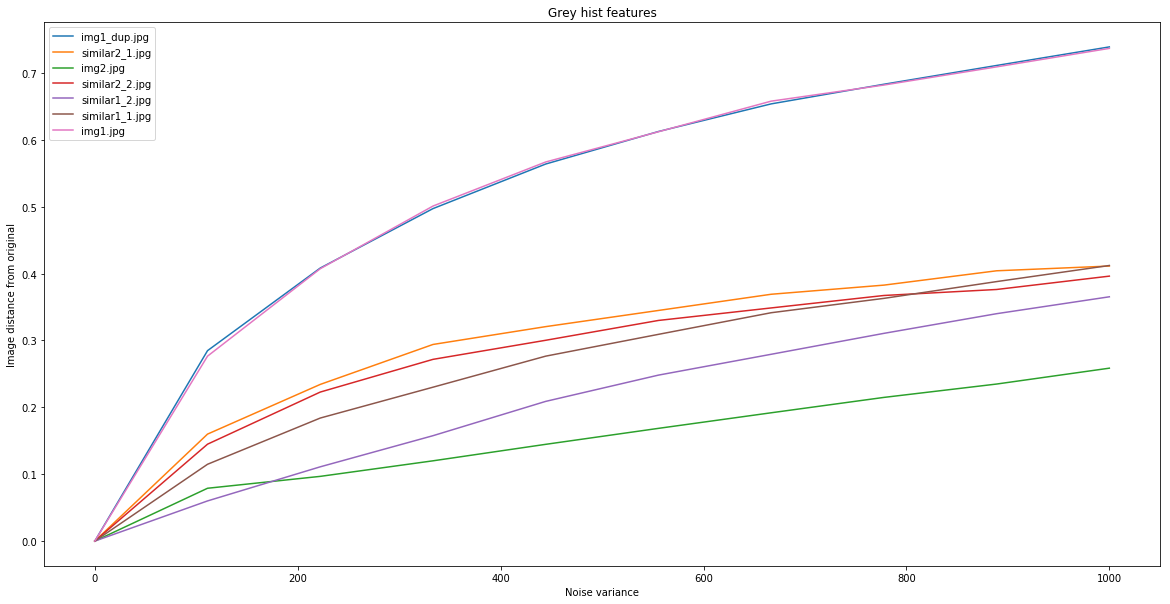

In [16]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = gray_histogram_features(img)
    noisy_pics = [gray_histogram_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Grey hist features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

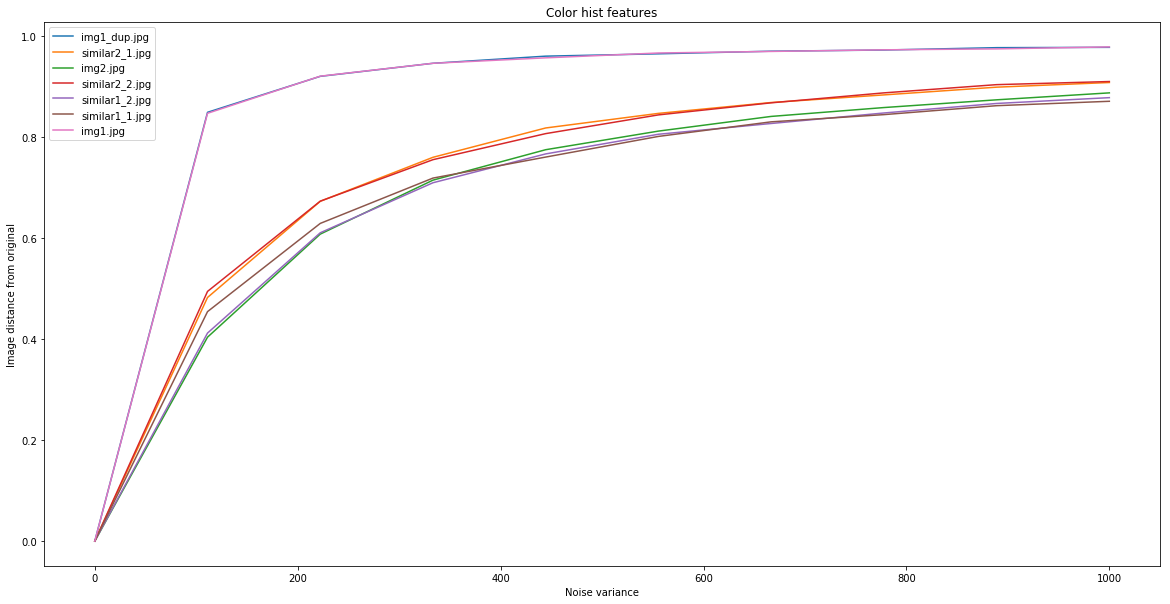

In [17]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = color_histogram_features(img)
    noisy_pics = [color_histogram_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Color hist features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

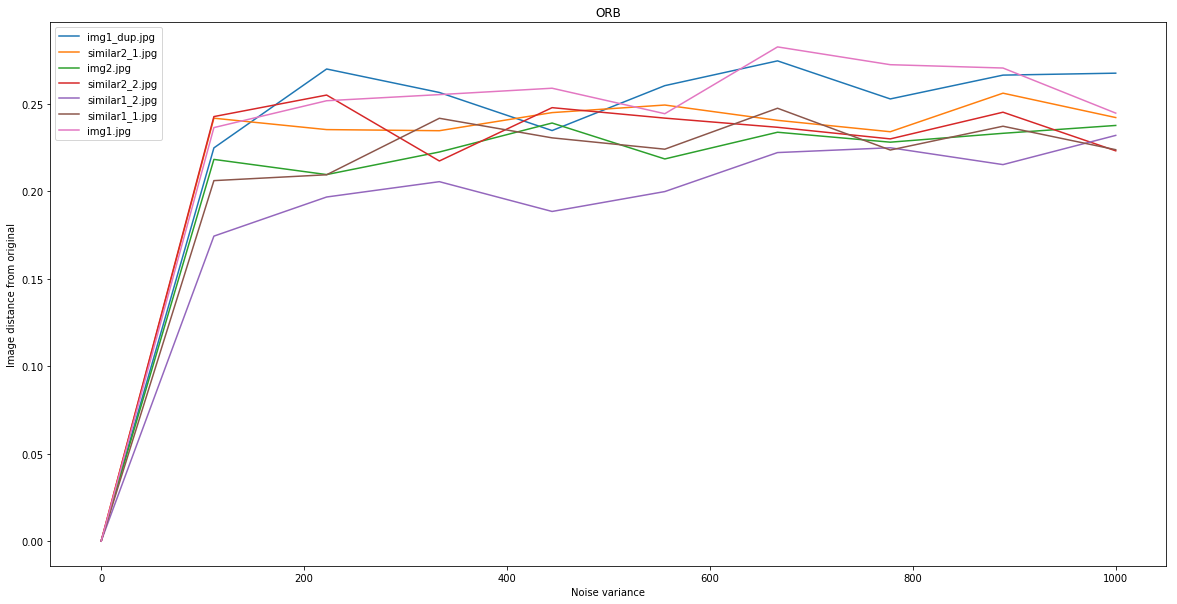

In [18]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = extract_descriptors(img)
    noisy_pics = [extract_descriptors(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('ORB')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

In [19]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = extract_descriptors(img, extractor=cv2.KAZE_create)
    noisy_pics = [extract_descriptors(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('KAZE')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

<Figure size 1440x720 with 0 Axes>

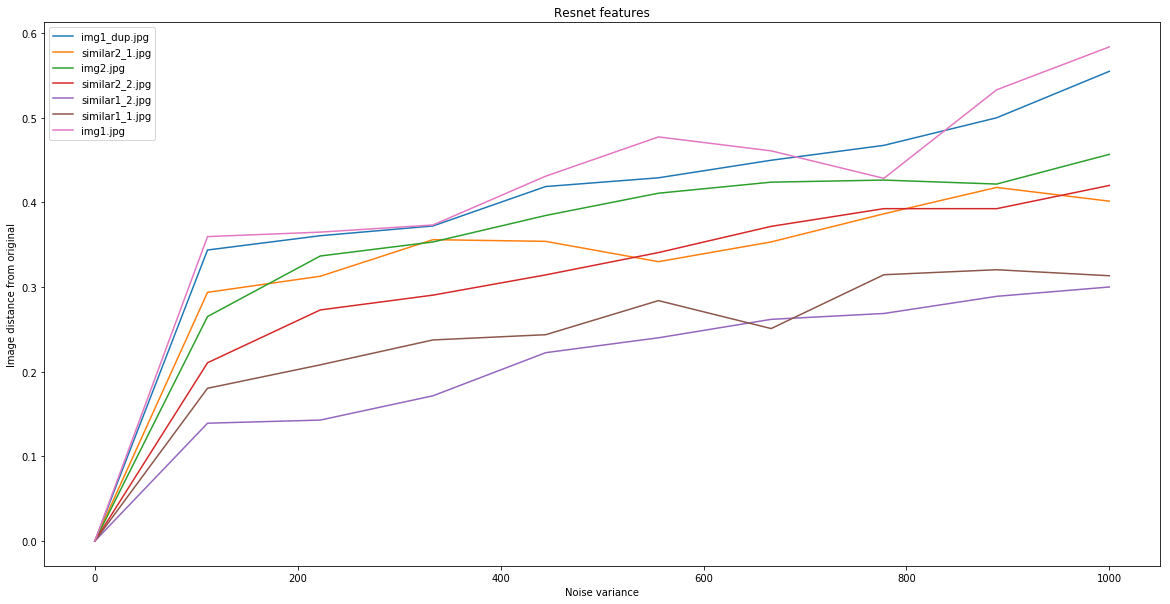

In [20]:
plt.figure(figsize=(20, 10))
variances = np.linspace(0, 1000, 10)
for i, img in enumerate(images):
    original = resnet_features(img)
    noisy_pics = [resnet_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Resnet features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

In [ ]:
# Winners: localhist and grey local hist

In [ ]:
# Attempt with denoise

In [ ]:
variances = np.linspace(0, 1000, 10)

In [ ]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = local_grey_histogram_features(img)
    noisy_pics = [local_grey_histogram_features(cv2.fastNlMeansDenoising(add_gaussian_noise(img, var=var)))
                  for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Local grey hist features denoised')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = local_histogram_features(img)
    noisy_pics = [local_histogram_features(cv2.fastNlMeansDenoising(add_gaussian_noise(img, var=var))) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Local hist features denoised')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

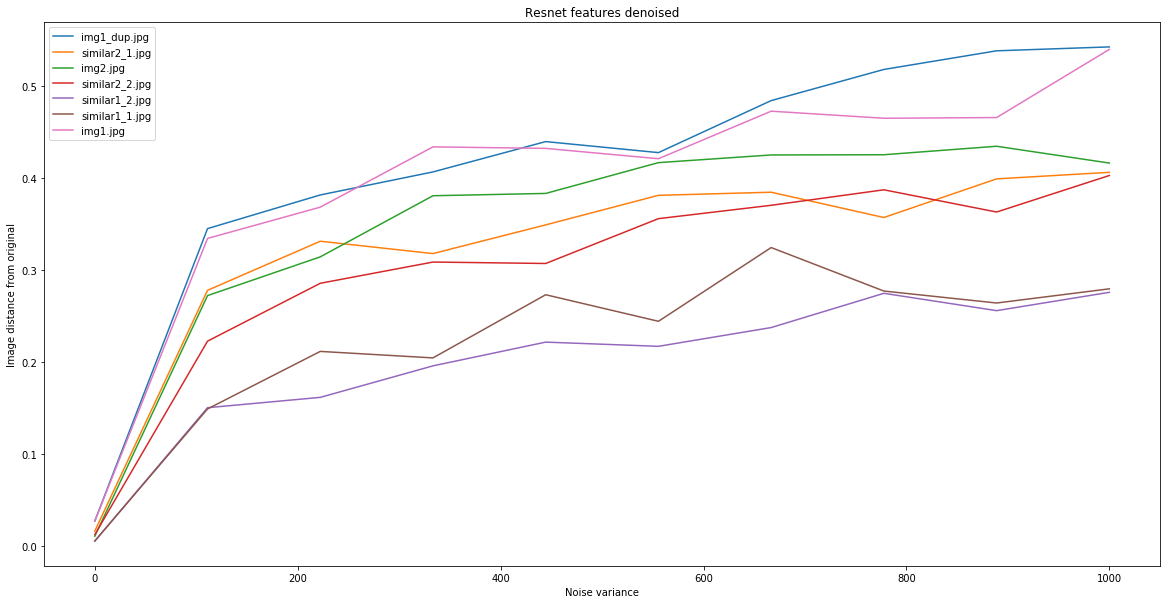

In [21]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = resnet_features(img)
    noisy_pics = [resnet_features(cv2.fastNlMeansDenoising(add_gaussian_noise(img, var=var))) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Resnet features denoised')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

# Color

In [24]:
def test_enhancer(enhancer, name):
    plt.figure(figsize=(20, 10))
    factors = np.linspace(0, 1, 7)
    img = images[1]
    img = Image.fromarray(img)
    enh = enhancer(img)
    i = 0
    for f in factors:
        plt.subplot(1, len(factors), i+1)
        plt.title(u'Factor '+ str(round(f, 2)))
        plot_img(enh.enhance(f))
        i+=1
    plt.title(name)
    plt.axis('off')
    plt.show()
    
    pil_pics = [Image.fromarray(img) for img in images]
    
    factors = np.linspace(1, 0, 20)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    for i, img in enumerate(images):
        original_vector = local_histogram_features(img)
        enh = enhancer(pil_pics[i])
        adjusted_pics = [np.array(enh.enhance(factor)) for factor in factors]
        vectors = [local_histogram_features(img) for img in adjusted_pics]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Local hist features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Enhance factor')
    plt.legend()

    plt.subplot(2, 1, 2)
    for i, img in enumerate(images):
        original_vector = resnet_features(img)
        enh = enhancer(pil_pics[i])
        adjusted_pics = [np.array(enh.enhance(factor)) for factor in factors]
        vectors = [resnet_features(img) for img in adjusted_pics]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Resnet features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Enhance factor')
    plt.legend()
    plt.show()

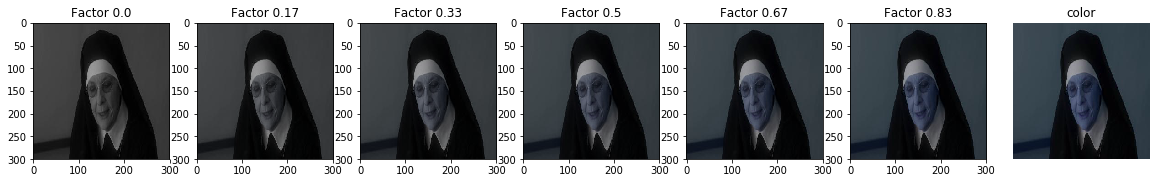

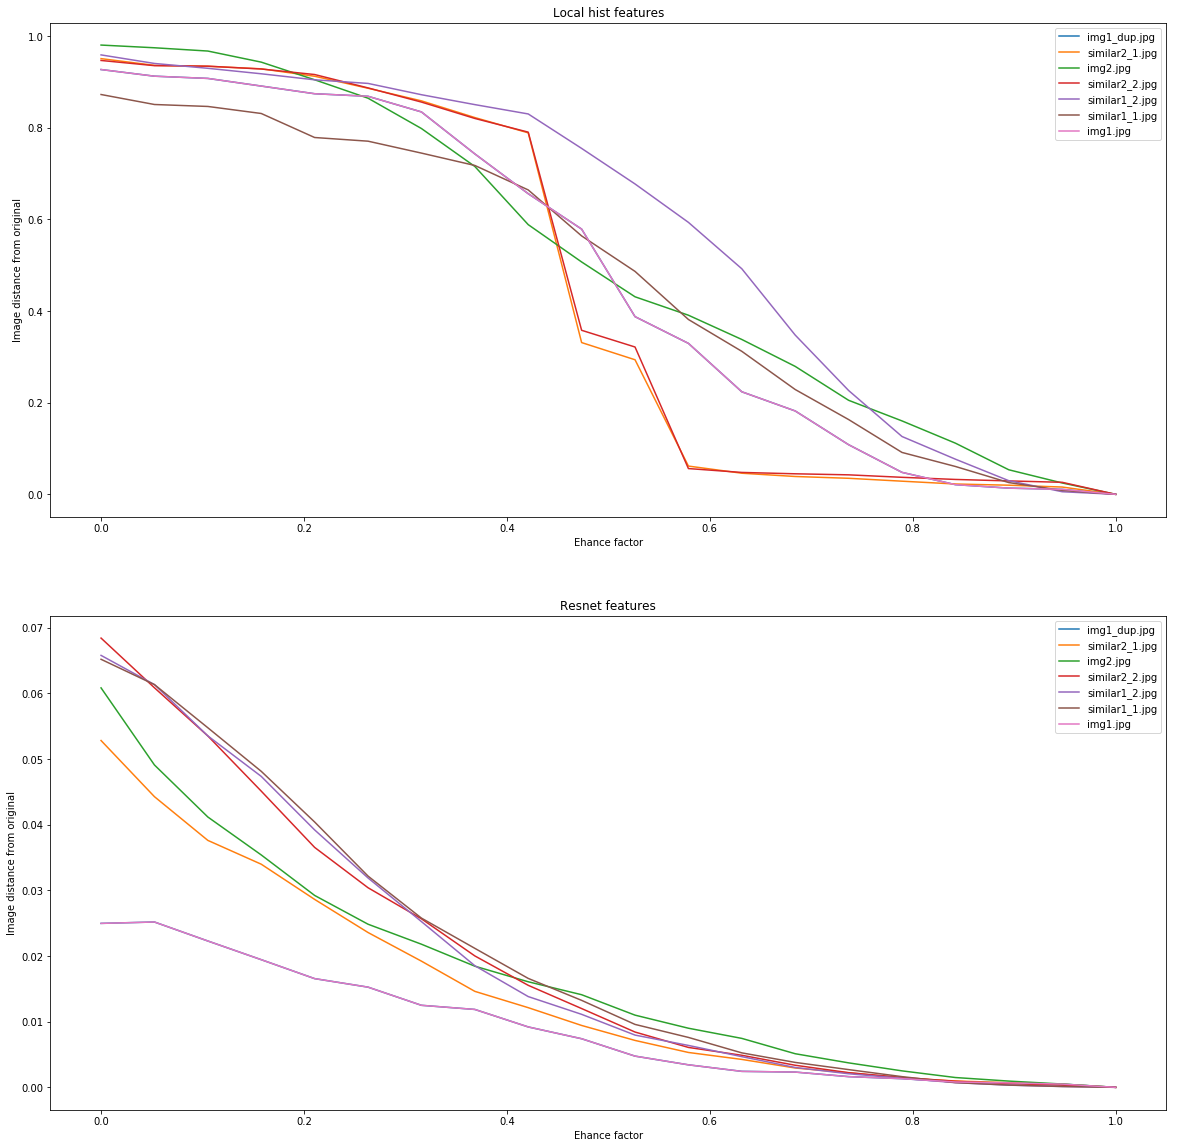

In [23]:
test_enhancer(ImageEnhance.Color, 'color')

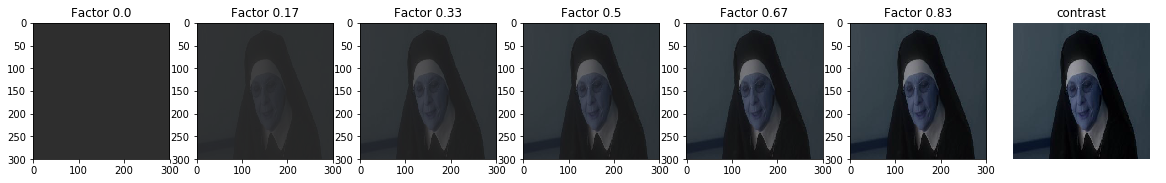

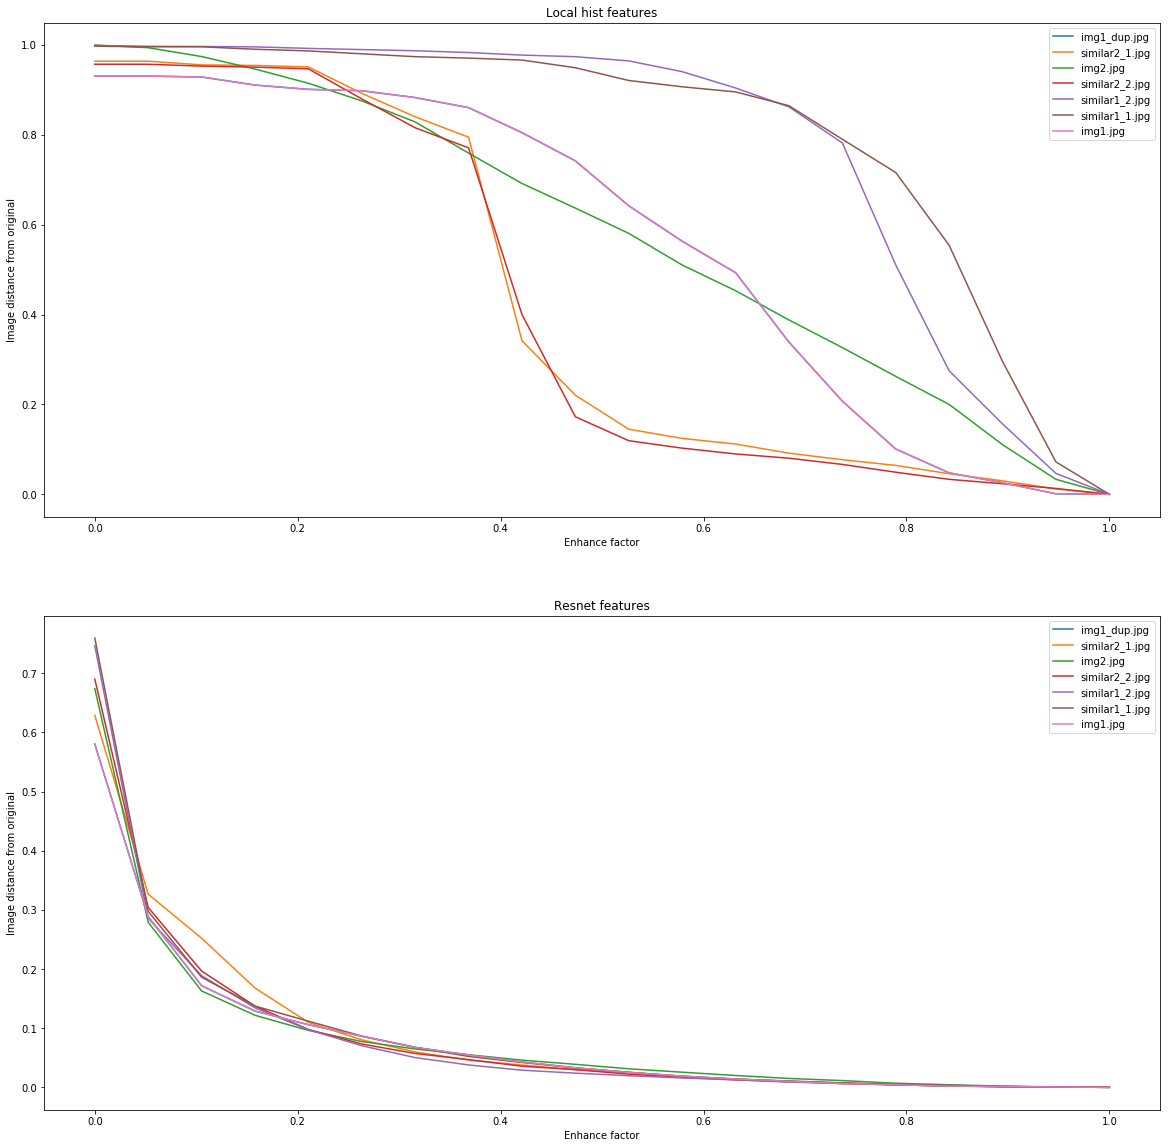

In [25]:
test_enhancer(ImageEnhance.Contrast, 'contrast')

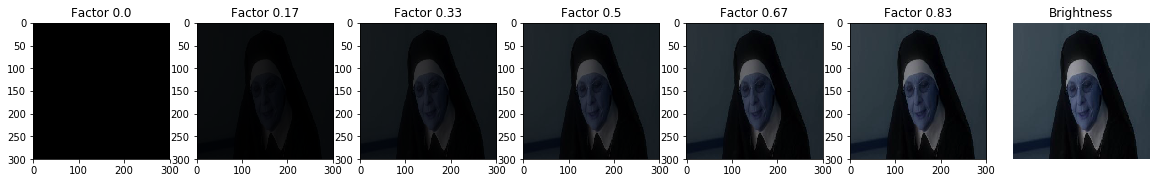

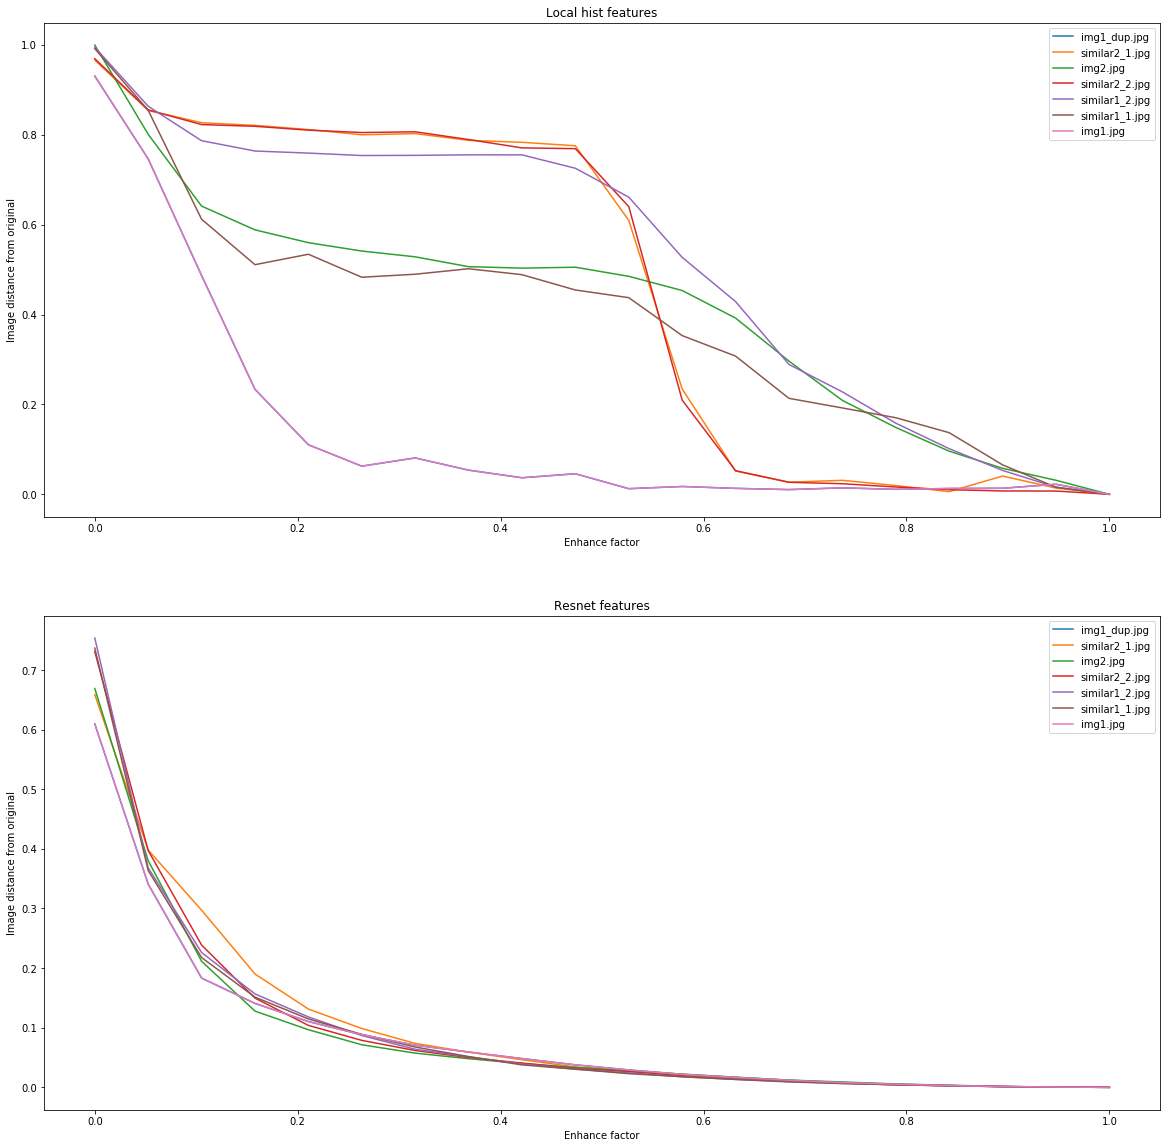

In [26]:
test_enhancer(ImageEnhance.Brightness, 'Brightness')

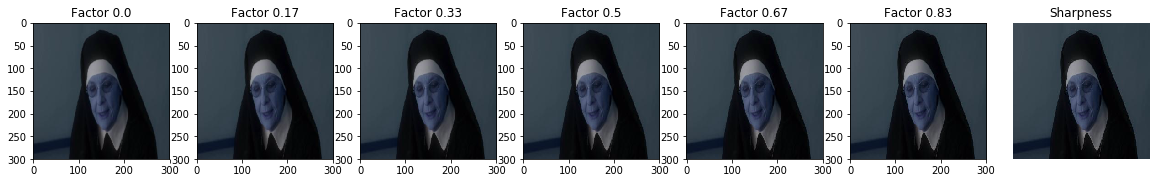

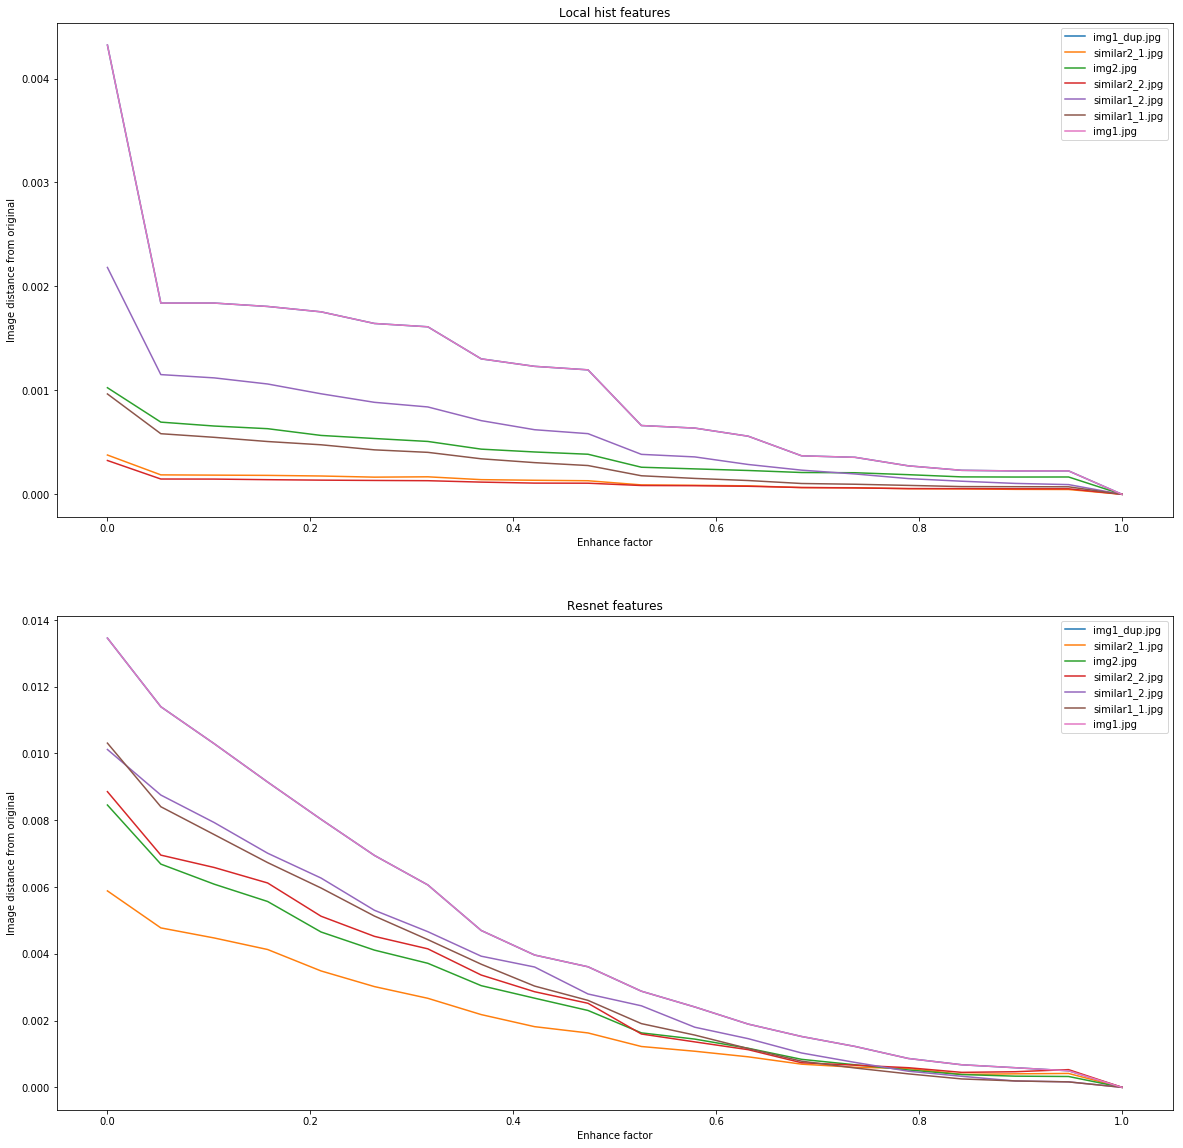

In [27]:
test_enhancer(ImageEnhance.Sharpness, 'Sharpness')

# Blur

Gaussian Blur


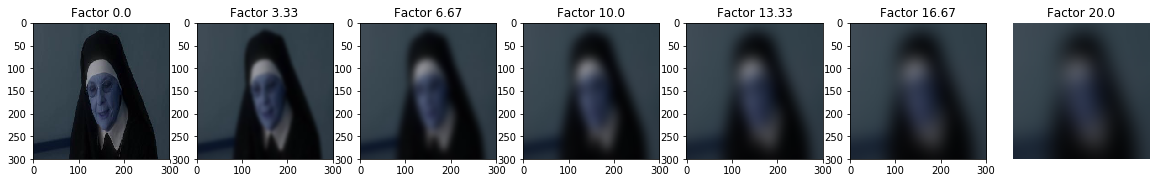

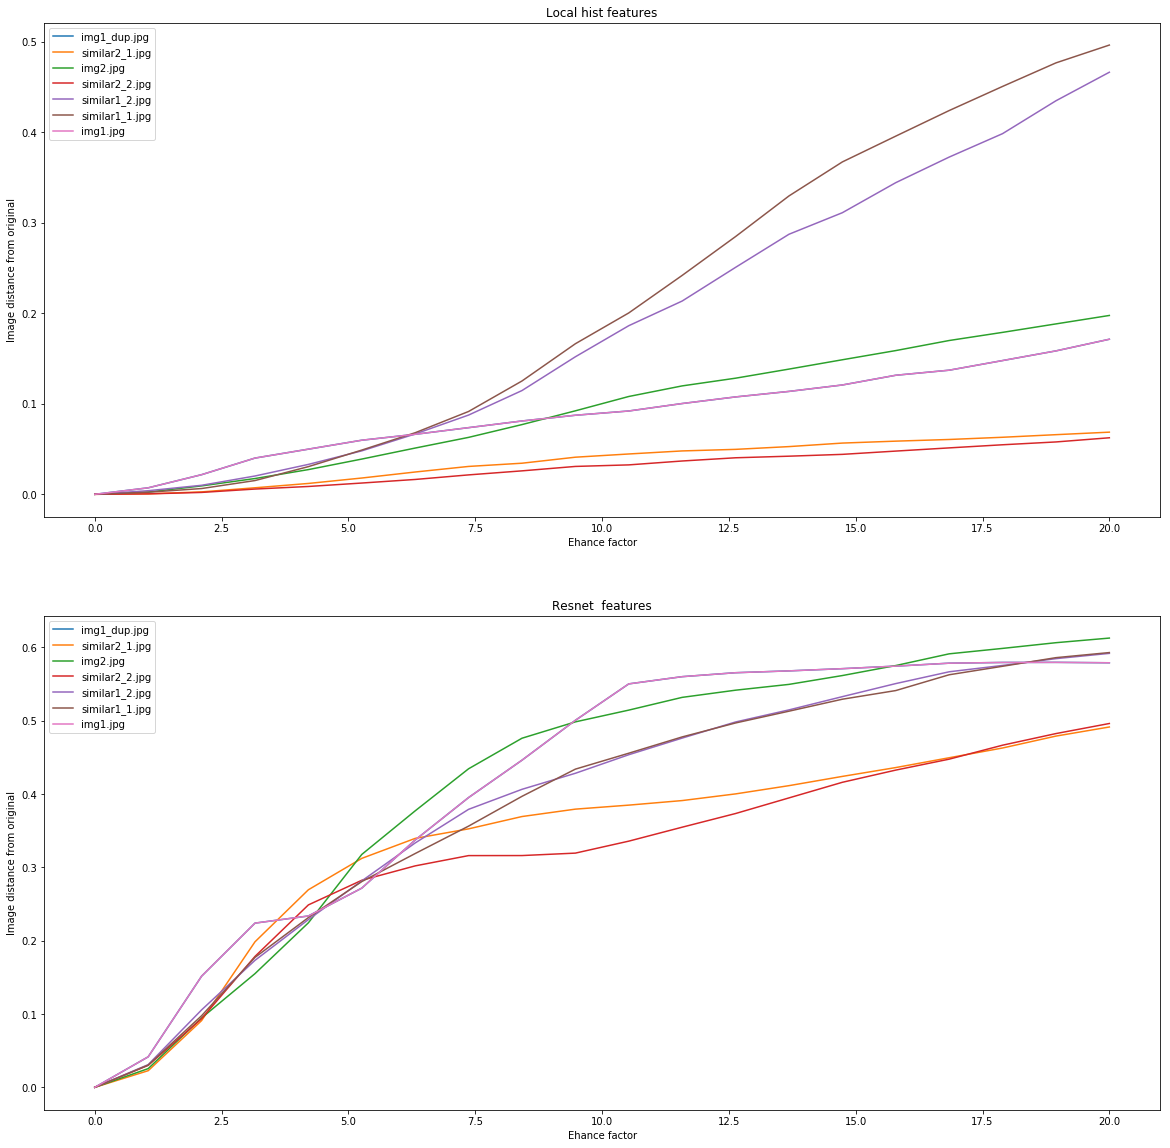

In [28]:
def test_filter(name):
    print(name)
    plt.figure(figsize=(20, 10))
    factors = np.linspace(0, 20, 7)
    img = images[1]
    img = Image.fromarray(img)
    i = 0
    for f in factors:
        plt.subplot(1, len(factors), i+1)
        plt.title(u'Factor '+ str(round(f, 2)))
        plot_img(img.filter(ImageFilter.GaussianBlur(radius=f)))
        i+=1
    plt.axis('off')
    plt.show()
    
    pil_pics = [Image.fromarray(img) for img in images]
    
    factors = np.linspace(0, 20, 20)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    for i, img in enumerate(images):
        original_vector = local_histogram_features(img)
        adjusted_pics = [Image.fromarray(img).filter(ImageFilter.GaussianBlur(radius=factor)) for factor in factors]
        vectors = [local_histogram_features(np.array(img)) for img in adjusted_pics]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Local hist features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Ehance factor')
    plt.legend()

    plt.subplot(2, 1, 2)
    for i, img in enumerate(images):
        original_vector = resnet_features(img)
        adjusted_pics = [Image.fromarray(img).filter(ImageFilter.GaussianBlur(radius=factor)) for factor in factors]
        vectors = [resnet_features(np.array(img)) for img in adjusted_pics]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Resnet  features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Ehance factor')
    plt.legend()
    plt.show()
test_filter('Gaussian Blur')

In [29]:
def test_img_corruption(name, corrupt, factors, display_factors):
    plt.figure(figsize=(20, 10))
    img = images[1]
    img = Image.fromarray(img)
    i = 0
    for factor in display_factors:
        plt.subplot(1, len(display_factors), i+1)
        plt.title(u'Factor '+ str(round(factor, 2)))
        plot_img(corrupt(img, factor))
        i+=1
    plt.title(name)
    plt.axis('off')
    plt.show()
    
    pil_pics = [Image.fromarray(img) for img in images]
    adjusted_pics = []
    for i, img in enumerate(pil_pics):
        adjusted_pics.append([corrupt(img, factor) for factor in factors])
        
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    for i, img in enumerate(images):
        original_vector = local_histogram_features(img)
        vectors = [local_histogram_features(np.array(img)) for img in adjusted_pics[i]]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Local hist features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Corruption factor')
    plt.legend()

    plt.subplot(2, 1, 2)
    for i, img in enumerate(images):
        original_vector = resnet_features(img)
        vectors = [resnet_features(np.array(img)) for img in adjusted_pics[i]]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Resnet features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Corruption factor')
    plt.legend()
    plt.show()

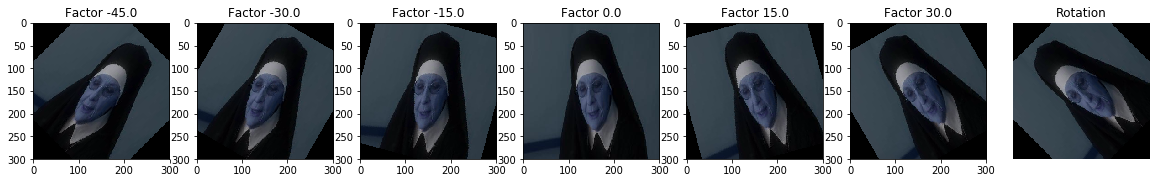

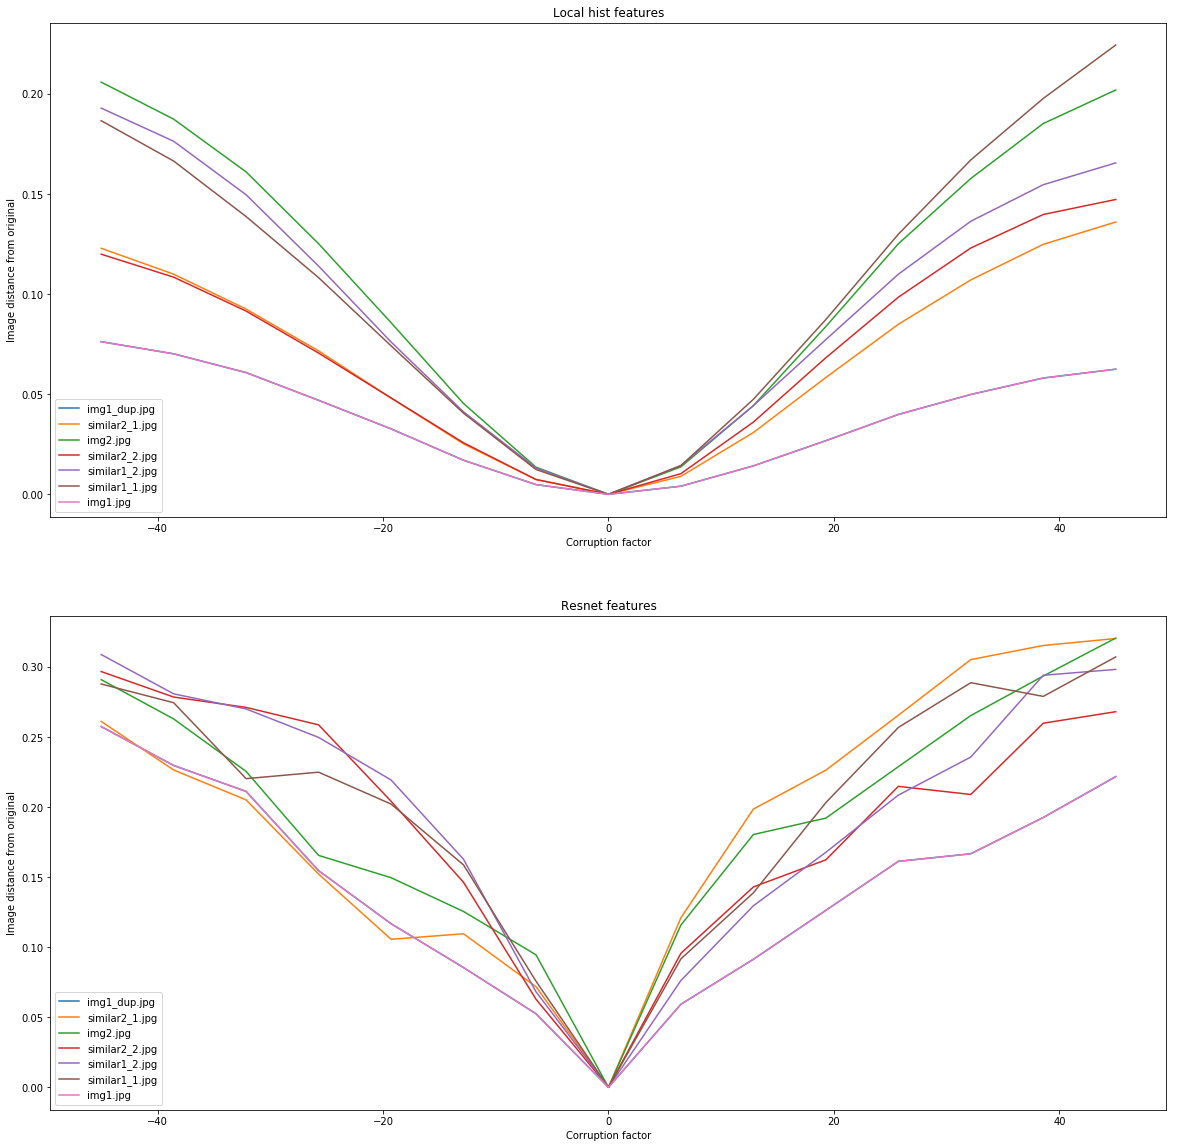

In [30]:
def corrupt_rotate(img, degree):
    return img.rotate(degree)

degrees = np.linspace(-45, 45, 15)
display_degrees = np.linspace(-45, 45, 7)
test_img_corruption('Rotation', corrupt_rotate, degrees, display_degrees)

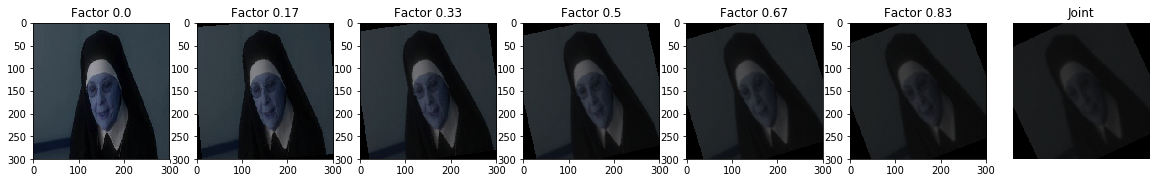

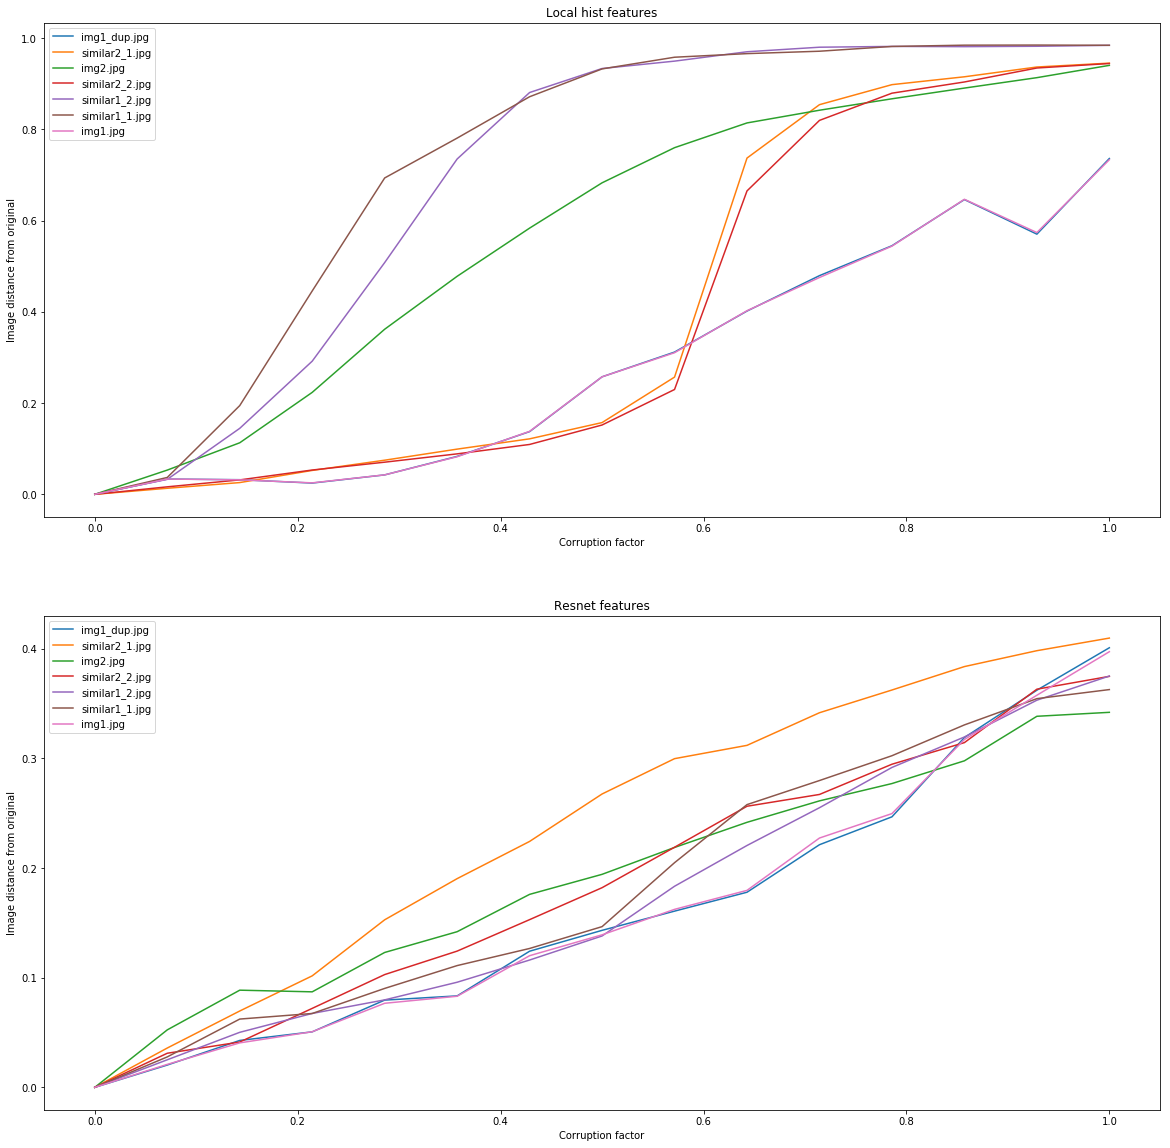

In [31]:
factors = np.linspace(0, 1, 15)
factors_display = np.linspace(0, 1, 7)
test_img_corruption('Joint', joint_corrupt, factors, factors_display)

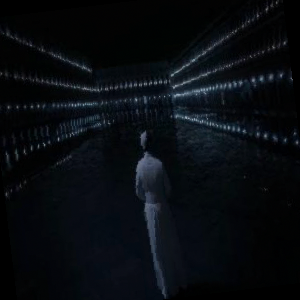

In [32]:
random_corrupt(Image.fromarray(images[0]))

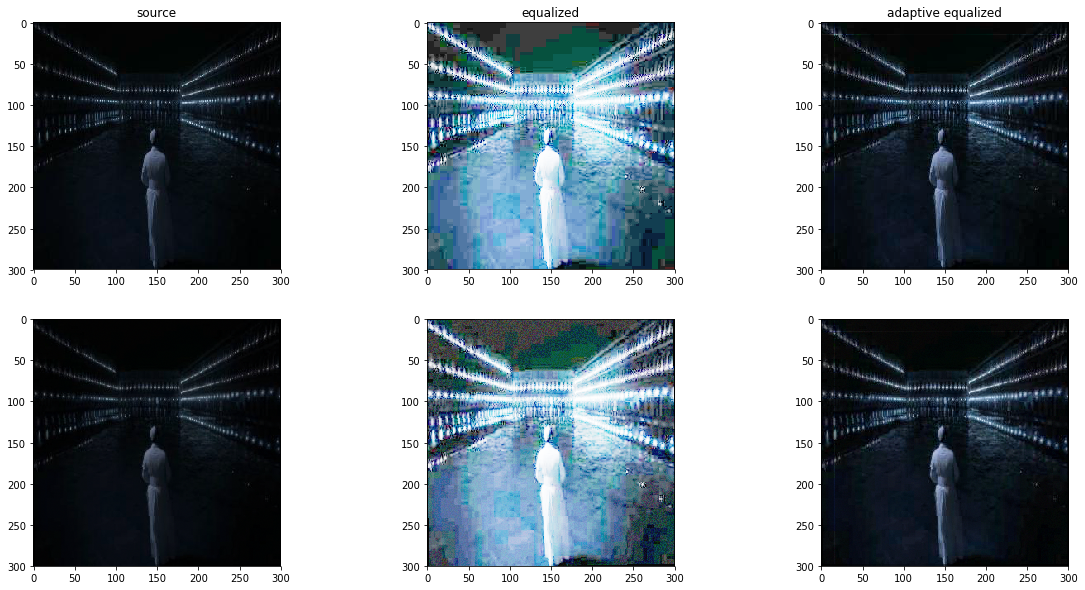

In [33]:

img_i = 0
plt.figure(figsize=(20,10))
source = images[img_i]
equalized_source = exposure.equalize_hist(source)
adap_equalized_source = exposure.equalize_adapthist(source)

corrupted = np.array(random_corrupt(pil_images[img_i]))
equalized_corrupted = exposure.equalize_hist(corrupted)
adap_equalized_corrupted = exposure.equalize_adapthist(corrupted)

plt.subplot(2, 3, 1)
plt.title('source')
plot_img(source)
plt.subplot(2, 3, 2)
plt.title('equalized')
plot_img(equalized_source)
plt.subplot(2, 3, 3)
plt.title('adaptive equalized')
plot_img(adap_equalized_source)

plt.subplot(2, 3, 4)
plot_img(corrupted)
plt.subplot(2, 3, 5)
plot_img(equalized_corrupted)
plt.subplot(2, 3, 6)
plot_img(adap_equalized_corrupted)

In [34]:
def test_img_corruption_restoration(name, preprocess, corrupt, factors, display_factors):
    plt.figure(figsize=(20, 10))
    img = images[1]
    img = Image.fromarray(img)
    i = 0
    for factor in display_factors:
        plt.subplot(1, len(display_factors), i+1)
        plt.title(u'Factor '+ str(round(factor, 2)))
        plot_img(corrupt(img, factor))
        i+=1
    plt.title(name)
    plt.axis('off')
    plt.show()
    
    pil_pics = [Image.fromarray(img) for img in images]
    adjusted_pics = []
    for i, img in enumerate(pil_pics):
        adjusted_pics.append([corrupt(img, factor) for factor in factors])
        
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    for i, img in enumerate(images):
        original_vector = local_histogram_features(preprocess(img))
        vectors = [local_histogram_features(np.array(img)) for img in adjusted_pics[i]]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Local hist features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Corruption factor')
    plt.legend()

    plt.subplot(2, 1, 2)
    for i, img in enumerate(images):
        original_vector = resnet_features(preprocess(img))
        vectors = [resnet_features(np.array(img)) for img in adjusted_pics[i]]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Resnet features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Corruption factor')
    plt.legend()
    plt.show()

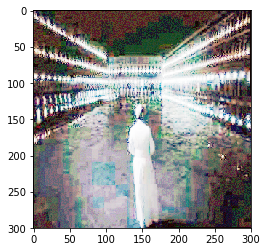

In [35]:
plot_img(restore_image(Image.fromarray(corrupted)))

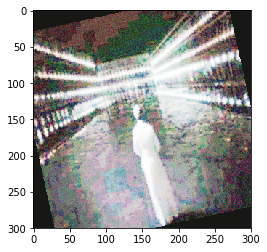

In [36]:
def corrupt_and_restore(img, factor):
    corrupted = joint_corrupt(img, factor)
    restored = restore_image(corrupted)
    return restored

plot_img(corrupt_and_restore(pil_images[0], 0.5))

In [37]:
def prep(image):
    image = exposure.equalize_hist(np.array(image))
    return skimage.img_as_ubyte(image)

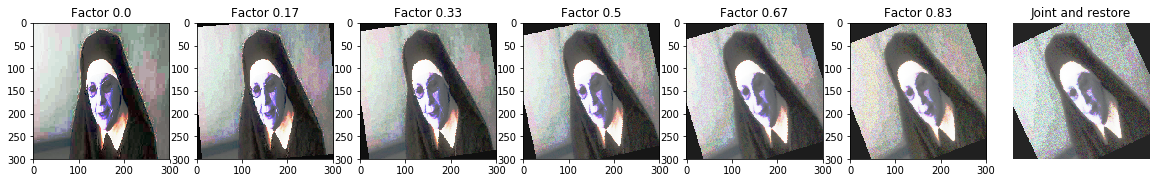

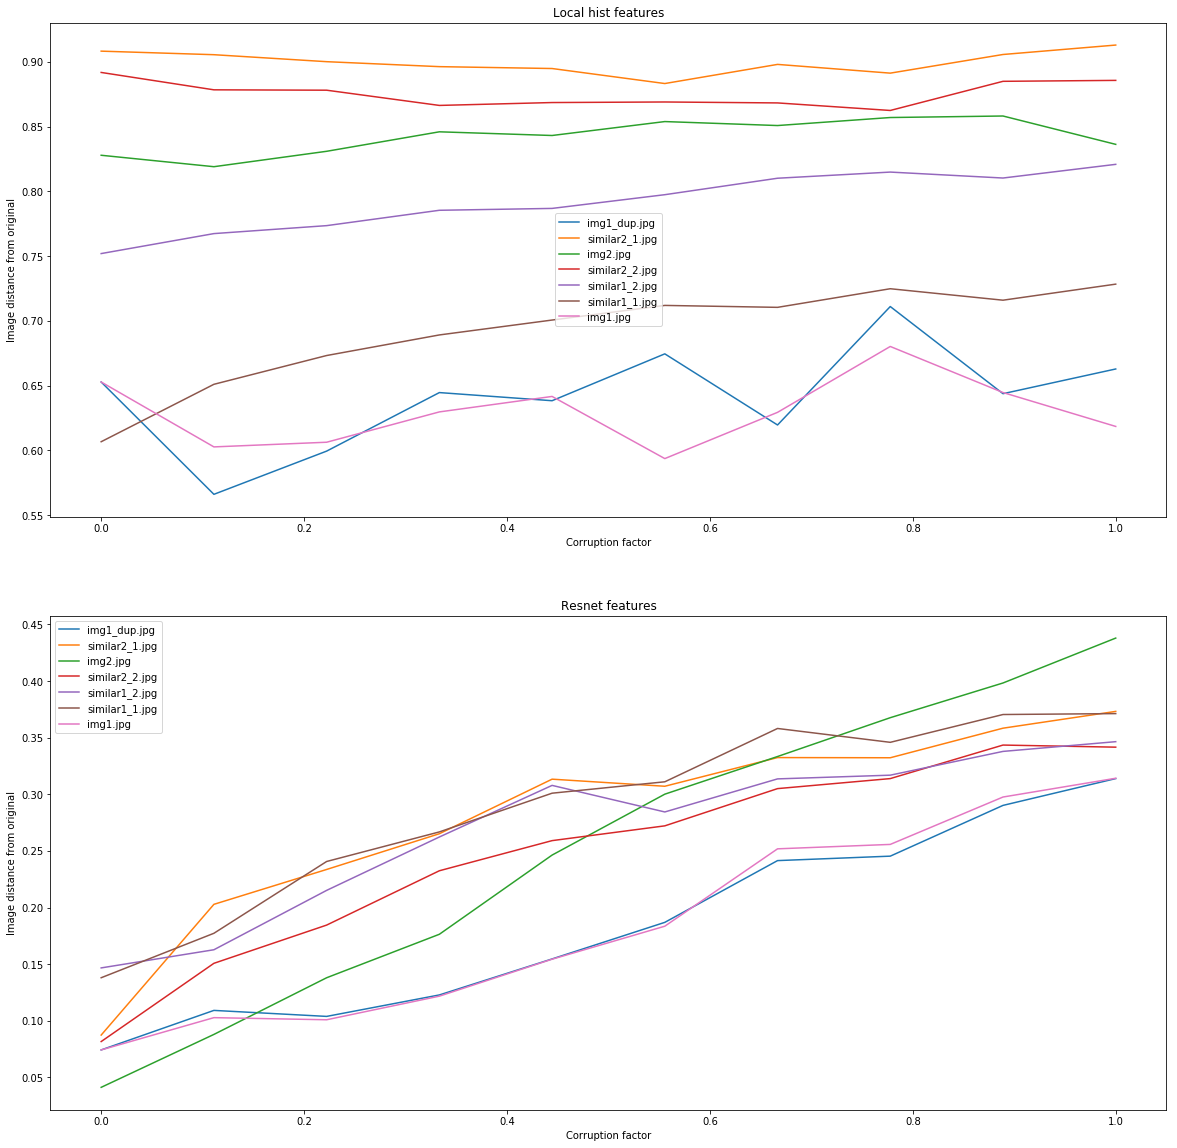

In [39]:
factors = np.linspace(0, 1, 10)
factors_display = np.linspace(0, 1, 7)
test_img_corruption_restoration('Joint and restore', prep, corrupt_and_restore, factors, factors_display)

In [36]:
joint_feature_extractor(images[0]).shape

(996,)

In [49]:
def test_img_corruption_joint(name, preprocess, corrupt, factors, display_factors):
    plt.figure(figsize=(20, 10))
    img = images[1]
    img = Image.fromarray(img)
    i = 0
    for factor in display_factors:
        plt.subplot(1, len(display_factors), i+1)
        plt.title(u'Factor '+ str(round(factor, 2)))
        plot_img(corrupt(img, factor))
        i+=1
    plt.title(name)
    plt.axis('off')
    plt.show()
    
    pil_pics = [Image.fromarray(img) for img in images]
    adjusted_pics = []
    for i, img in enumerate(pil_pics):
        adjusted_pics.append([corrupt(img, factor) for factor in factors])
        
    plt.figure(figsize=(20, 10))
    for i, img in enumerate(images):
        original_vector = joint_feature_extractor(preprocess(img), k_points=1)
        vectors = [joint_feature_extractor(np.array(img), k_points=1) for img in adjusted_pics[i]]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Joint (grey + orb) features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Corruption factor')
    plt.legend()
    plt.show()

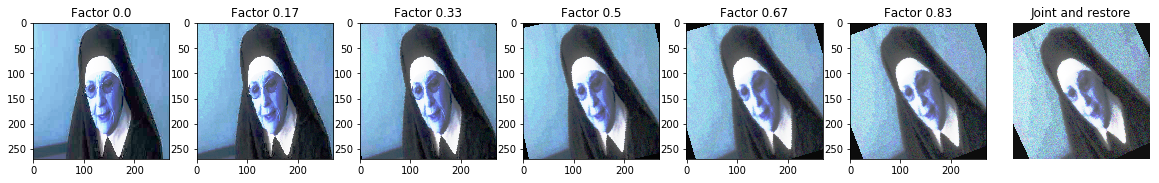

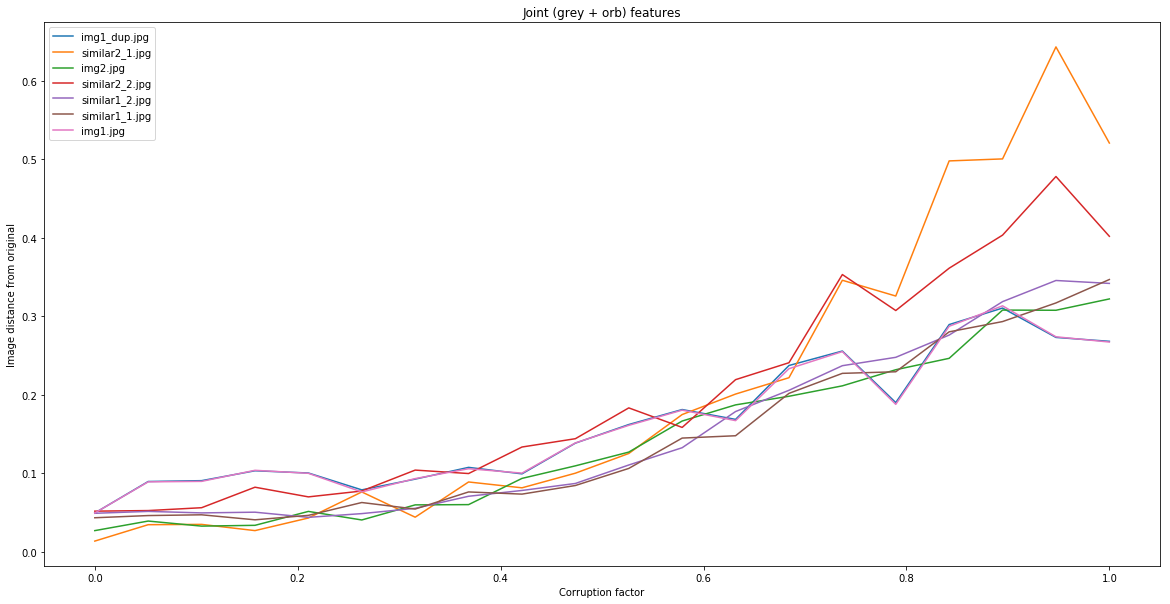

In [50]:
factors = np.linspace(0, 1, 20)
factors_display = np.linspace(0, 1, 7)
test_img_corruption_joint('Joint and restore', prep, corrupt_and_restore, factors, factors_display)